In [26]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap

In [28]:
datasets.make_moons(n_samples=n_samples, noise=0.2, random_state=0)

(array([[-1.09443462e-02,  9.89784876e-01],
        [ 1.96749886e+00, -1.10921978e-01],
        [ 9.18923151e-01, -7.87831621e-03],
        [-1.97813183e-02,  3.67422878e-02],
        [ 8.97047211e-01, -5.26043067e-01],
        [ 2.05087697e+00,  4.82966687e-01],
        [ 5.52592656e-01,  5.10008493e-01],
        [ 9.36108682e-01, -6.67176177e-01],
        [-8.57905150e-03,  3.44030710e-01],
        [ 1.79962867e+00,  3.22578165e-01],
        [-1.79739813e-01,  5.12417381e-01],
        [ 1.96928635e+00, -1.84060982e-01],
        [ 1.40757108e+00, -6.55885144e-01],
        [ 1.04103920e+00,  1.04537944e+00],
        [ 6.11861752e-01,  5.09315861e-01],
        [-3.59476500e-01,  1.05930036e+00],
        [ 2.54029695e-01,  1.15116524e+00],
        [ 2.13555501e-01,  8.82321641e-01],
        [-3.30880800e-01,  8.04221145e-01],
        [ 1.06603845e+00,  5.32174106e-01],
        [-7.06988363e-01,  5.63246401e-01],
        [ 4.02928450e-01, -1.95330382e-01],
        [ 7.83527128e-01,  5.656

In [29]:
n_samples = 100
datasets = [
    datasets.make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    datasets.make_circles(n_samples=n_samples, noise=0.2, factor=0.2, random_state=1),
    datasets.make_blobs(n_samples=n_samples, centers=2, random_state=5),
    datasets.make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]

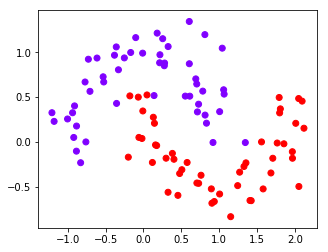

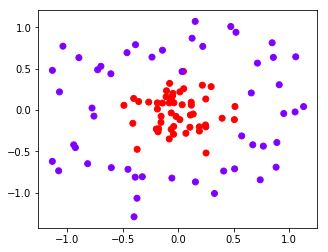

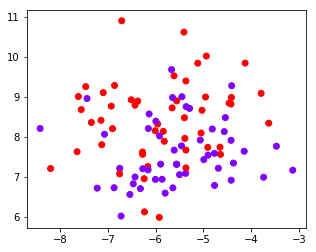

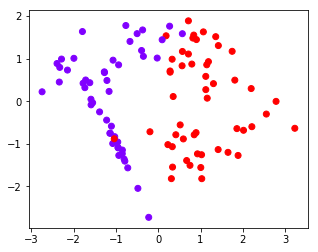

In [31]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for (X, y) in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


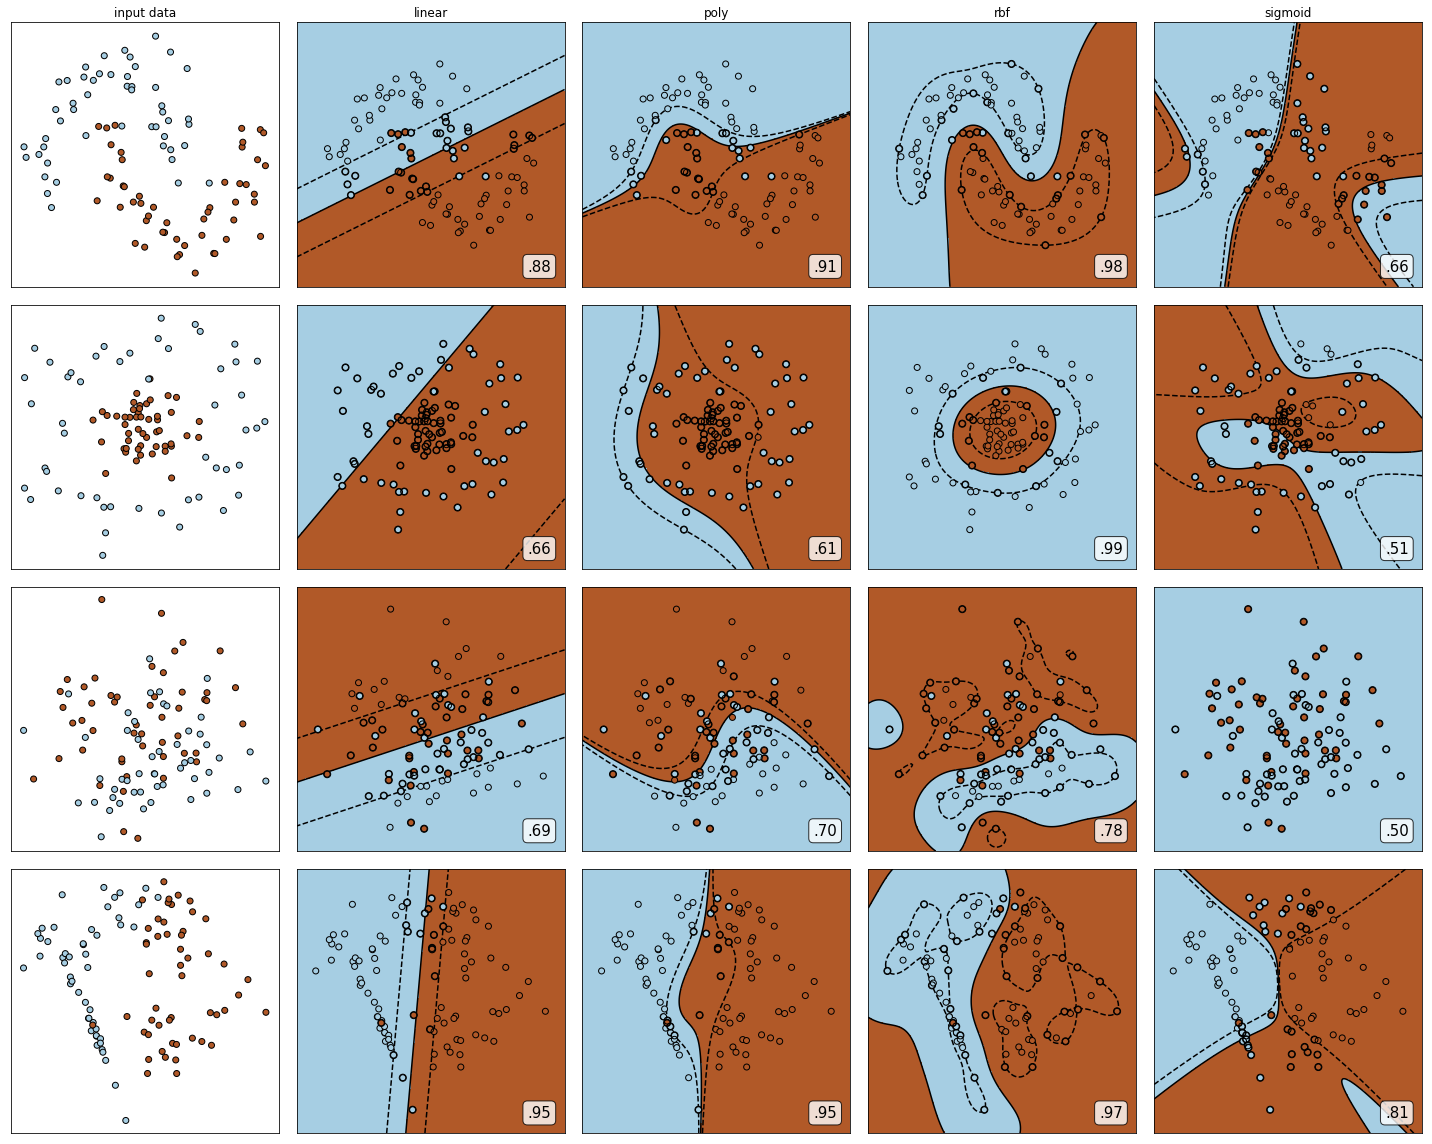

In [32]:
    
    nrow = len(datasets)
    ncols = len(kernels) + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
    for i_index, (X, y) in enumerate(datasets):
        # 获取每一行的第一个 也就是获取第一列
        ax = axes[i_index, 0]
        if i_index == 0:
            ax.set_title('input data')
        # 绘制原始的散点图
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10, edgecolors='k')
        ax.set_xticks(())
        ax.set_yticks(())

        # 开始遍历列
        for j_index, kernel in enumerate(kernels):
            # 获取坐标轴
            ax = axes[i_index, j_index + 1]
            # 建立模型
            clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
            score = clf.score(X, y)

            # 绘制散点图
            ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

            # 绘制支持向量
            ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, zorder=10, facecolors='none',
                       edgecolors='k')
            # 坐标抽边界
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

            # np.mgrid 就相当于np.linespace和np.meshgrid的用法 一次性使用最大值和最小值生成网格
            # np.mgrid[起始值: 结束值: 步长]
            # 如果步长是复数，其整数部分表示要创建点的数量 并且包含结束值
            xx, yy = np.mgrid[x_min: x_max: 200j, y_min: y_max: 200j]
            # np.c_ 类似于np.vstack
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            # 给等高线填充不同的颜色
            ax.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
            # 绘制等高线
            ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
            # 设置坐标轴什么都不显示
            ax.set_xticks(())
            ax.set_yticks(())
            if i_index == 0:
                ax.set_title(kernel)

            # 为每张图添加分类的分数
            ax.text(0.95, 0.06,  # 文本坐标
                    ('%.2f' % score).lstrip('0'),  # 显示的文本
                    size=15,  # 文本大小
                    bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),  # 文本框 圆角 背景为黑色 透明度0.8 文本颜色为白色
                    transform=ax.transAxes,  # 相对于哪个坐标轴
                    horizontalalignment='right',
                    )

    plt.tight_layout()
    plt.show()